In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm


In [2]:
# Function definition
t = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Also used to compute Jacobian
y = np.array([3.5, 4.9, 6.1, 6.8, 7, 7.3, 7.8, 8, 8.15, 8.25])

def func(alpha, beta):
    return alpha*t / (t+beta)

def err_norm(f):
    return 0.5 * (np.linalg.norm(y - f)**2)


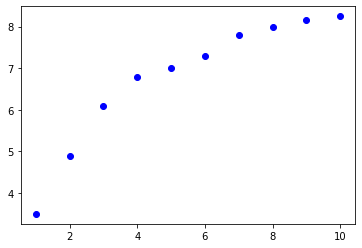

In [3]:
# Visualize y over t
plt.plot(t, y, 'bo')

Text(0.5, 0, 'z')

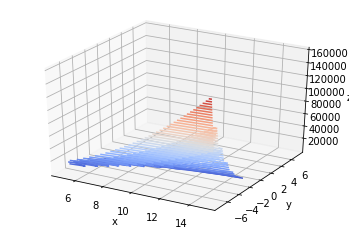

In [4]:
# Visualize error
nx = 30
ny = 30
xs = np.linspace(5.0, 15.0, nx)
ys = np.linspace(-7.2, 7.2, ny)

X, Y = np.meshgrid(xs, ys)
Z = np.array([[err_norm(func(X[j,i], Y[j,i])) for i in range(nx)] for j in range(ny)])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# ax.view_init(60, 35)



In [5]:
init_a = 10
init_b = 0.5
x = np.array([init_a,init_b])

for it in range(15):  # Gauss-Newton step 
    a = x[0]   
    b = x[1]
    f = func(a, b)
    r = y - f
    err = 0.5*np.linalg.norm(r)
    print("Step " + str(it+1) + ". Error: " + str(err))
    print("a: " + str(a) + ", b: " + str(b)) 
    print("")

    d_a = - t / (t+b)
    d_b = a*t / (t+b)**2

    J = np.stack([d_a, d_b], axis=1) 

    inv = np.linalg.inv(J.transpose() @ J)
    delta = - inv @ J.transpose() @ r

    x = x + delta

Step 1. Error: 3.388505780153581
a: 10.0, b: 0.5

Step 2. Error: 0.6995615612598409
a: 9.112859201938754, b: 1.1488031949394988

Step 3. Error: 0.20203772921371824
a: 9.633279109876723, b: 1.7186176377379918

Step 4. Error: 0.16479456326126332
a: 9.800837226808532, b: 1.8749879548065131

Step 5. Error: 0.164692336476671
a: 9.81063668731123, b: 1.8837048960800176

Step 6. Error: 0.16469232289769942
a: 9.810773661555634, b: 1.8838117435049708

Step 7. Error: 0.1646923228963438
a: 9.810775078181699, b: 1.8838128141588864

Step 8. Error: 0.1646923228963433
a: 9.810775092344748, b: 1.8838128248598422

Step 9. Error: 0.1646923228963433
a: 9.810775092486299, b: 1.8838128249667923

Step 10. Error: 0.1646923228963434
a: 9.810775092487715, b: 1.8838128249678618

Step 11. Error: 0.16469232289634345
a: 9.810775092487729, b: 1.8838128249678725

Step 12. Error: 0.16469232289634345
a: 9.810775092487729, b: 1.8838128249678727

Step 13. Error: 0.1646923228963435
a: 9.810775092487729, b: 1.8838128249678

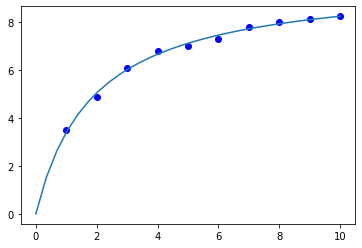

In [6]:
# Visualize result
a,b = x
sample_x = np.linspace(0, 10, 30)
sample_y = np.array([a*x / (b + x) for x in sample_x])

plt.plot(t, y, 'bo')
plt.plot(sample_x, sample_y)
